In [24]:
ROOT = "/content/drive/MyDrive/Colab Notebooks"

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import os
os.chdir(ROOT)

In [27]:
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks'

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
import pandas as pd

# plt.style.use("fivethirtyeight")

In [29]:
class Perceptron:
  def __init__(self, eta, epochs):
    self.weights = np.random.randn(3) * 1e-4
    print(f"self.weights: {self.weights}")
    self.eta = eta
    self.epochs = epochs

  def activationFunction(self, inputs, weights):
    z = np.dot(inputs, weights)
    return np.where(z > 0 , 1, 0)

  def fit(self, X, y):
    self.X = X
    self.y = y

    X_with_bias = np.c_[self.X, -np.ones((len(self.X), 1))] # concactination
    print(f"X_with_bias: \n{X_with_bias}")

    for epoch in range(self.epochs):
      print(f"for epoch: {epoch}")
      y_hat = self.activationFunction(X_with_bias, self.weights)
      print(f"predicted value: \n{y_hat}")
      error = self.y - y_hat
      print(f"error: \n{error}")
      self.weights = self.weights + self.eta * np.dot(X_with_bias.T, error)
      print(f"updated weights: \n{self.weights}")
      print("#############\n")

  def predict(self, X):
    X_with_bias = np.c_[X, -np.ones((len(self.X), 1))]
    return self.activationFunction(X_with_bias, self.weights)


In [30]:
# discarded
# activationFunction = lambda inputs, weights: np.where(np.dot(inputs, weights) > 0 , 1, 0)

```python
def activationFunction(inputs, weights):
  z = np.dot(inputs, weights)
  y_hat = np.where(z > 0, 1, 0)
  return y_hat

def activationFunction(inputs, weights):
  z = np.dot(inputs, weights)
  if z > 0:
    y_hat = 1
  else:
    y_hat = 0
  return y_hat


```

# AND

In [31]:
data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [0,0,0,1]}

AND = pd.DataFrame(data)
AND

x1  x2  y
0   0   0  0
1   0   1  0
2   1   0  0
3   1   1  1

In [32]:
X = AND.drop("y", axis=1) # axis = 1 >>> dropping accross column
X

x1  x2
0   0   0
1   0   1
2   1   0
3   1   1

In [33]:
y = AND['y']
y.to_frame()

y
0  0
1  0
2  0
3  1

In [34]:
# model = Perceptron(eta = 0.5, epochs=10, activationFunction=activationFunction)
model = Perceptron(eta = 0.5, epochs=10)

self.weights: [-2.20064788e-04 -2.11048623e-04  5.58392707e-05]


In [35]:
model.fit(X,y)

X_with_bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch: 0
predicted value: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights: 
[ 0.49977994  0.49978895 -0.49994416]
#############

for epoch: 1
predicted value: 
[1 1 1 1]
error: 
0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights: 
[-2.20064788e-04 -2.11048623e-04  1.00005584e+00]
#############

for epoch: 2
predicted value: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights: 
[0.49977994 0.49978895 0.50005584]
#############

for epoch: 3
predicted value: 
[0 0 0 1]
error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[0.49977994 0.49978895 0.50005584]
#############

for epoch: 4
predicted value: 
[0 0 0 1]
error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[0.49977994 0.49978895 0.50005584]
#############

for epoch: 5
predicted value: 
[0 0 0 1]
error: 
0    0
1    0
2    0
3 

In [36]:
model.predict(X)

array([0, 0, 0, 1])

In [37]:
model.weights

array([0.49977994, 0.49978895, 0.50005584])

## save and load model

In [38]:
import os

# saving model
dir_ = "model"
os.makedirs(dir_, exist_ok=True)
filename = os.path.join(dir_, 'AND_model.model')
joblib.dump(model, filename)

# some time later...

# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.predict(X)
print(result)

[0 0 0 1]


# OR

In [39]:
data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [0,1,1,1]}

OR = pd.DataFrame(data)
OR

x1  x2  y
0   0   0  0
1   0   1  1
2   1   0  1
3   1   1  1

In [40]:
X = OR.drop("y", axis=1) # axis = 1 >>> dropping accross column
X

x1  x2
0   0   0
1   0   1
2   1   0
3   1   1

In [41]:
y = OR['y']
y.to_frame()

y
0  0
1  1
2  1
3  1

In [42]:
model = Perceptron(eta = 0.5, epochs=10)

self.weights: [ 1.34446054e-04 -4.50690564e-05 -4.42465632e-05]


In [43]:
model.fit(X,y)

X_with_bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch: 0
predicted value: 
[1 0 1 1]
error: 
0   -1
1    1
2    0
3    0
Name: y, dtype: int64
updated weights: 
[ 1.34446054e-04  4.99954931e-01 -4.42465632e-05]
#############

for epoch: 1
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[1.34446054e-04 4.99954931e-01 4.99955753e-01]
#############

for epoch: 2
predicted value: 
[0 0 0 1]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights: 
[ 0.50013445  0.99995493 -0.50004425]
#############

for epoch: 3
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[ 5.00134446e-01  9.99954931e-01 -4.42465632e-05]
#############

for epoch: 4
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[0.50013445 0.99995493 0.49995575]
#############

for epoch: 5
predicted value: 
[0 1 1 1]
erro

# XOR

In [44]:
data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [0,1,1,0]}

XOR = pd.DataFrame(data)
XOR

x1  x2  y
0   0   0  0
1   0   1  1
2   1   0  1
3   1   1  0

In [45]:
X = XOR.drop("y", axis=1) # axis = 1 >>> dropping accross column
X

x1  x2
0   0   0
1   0   1
2   1   0
3   1   1

In [46]:
y = XOR['y']
y.to_frame()

y
0  0
1  1
2  1
3  0

In [47]:
model = Perceptron(eta = 0.5, epochs=50)


self.weights: [-1.07422207e-04  1.17860422e-04  1.62573476e-06]


In [48]:
model.fit(X,y)

X_with_bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch: 0
predicted value: 
[0 1 0 1]
error: 
0    0
1    0
2    1
3   -1
Name: y, dtype: int64
updated weights: 
[-1.07422207e-04 -4.99882140e-01  1.62573476e-06]
#############

for epoch: 1
predicted value: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights: 
[ 4.99892578e-01  1.17860422e-04 -9.99998374e-01]
#############

for epoch: 2
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights: 
[-1.07422207e-04 -4.99882140e-01  1.62573476e-06]
#############

for epoch: 3
predicted value: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights: 
[ 4.99892578e-01  1.17860422e-04 -9.99998374e-01]
#############

for epoch: 4
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights: 
[-1.07422207e-04 -4.99882140e-01  1.62573476e-06]
#############

for epoch: 5
pr

In [49]:
model.predict(X)

array([1, 1, 1, 1])

# Analysis with the graph

### AND GATE

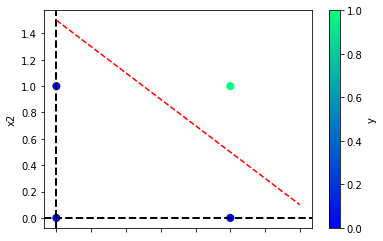

In [50]:
AND.plot(kind="scatter", x="x1", y="x2", c="y", s=50, cmap="winter")
plt.axhline(y=0, color="black", linestyle="--", linewidth=2)
plt.axvline(x=0, color="black", linestyle="--", linewidth=2)

x = np.linspace(0, 1.4) # >>> 50 
y = 1.5 - 1*np.linspace(0, 1.4) # >>> 50 

plt.plot(x, y, "r--")

### OR

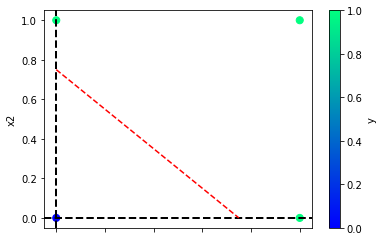

In [51]:
OR.plot(kind="scatter", x="x1", y="x2", c="y", s=50, cmap="winter")
plt.axhline(y = 0, color ="black", linestyle ="--", linewidth=2)
plt.axvline(x = 0, color ="black", linestyle ="--", linewidth=2)
plt.plot(np.linspace(0,0.75), 0.75 - 1*np.linspace(0,0.75), 'r--');

# XOR

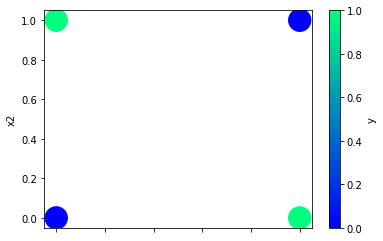

In [52]:
XOR.plot(kind="scatter", x="x1", y="x2", c="y", s=500, cmap="winter")
